In [2]:
import os
import fnmatch
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_f = "3dnet_kit_06_13_17"
%matplotlib inline

# Dataset Download

In [7]:
if not os.path.exists(data_f):
    !wget -v -L -O dexnet_2.tar.gz "https://app.box.com/index.php?rm=box_download_shared_file&shared_name=6mnb2bzi5zfa7qpwyn7uq5atb7vbztng&file_id=f_226328650746"
    !tar -xzf dexnet_2.tar.gz
    !rm dexnet_2.tar.gz

# Available Files

In [16]:
first_set = fnmatch.filter(os.listdir(data_f), '*00000.npz')
for el in first_set:
    print(el)

robust_ferrari_canny_00000.npz
binary_ims_tf_00000.npz
object_labels_00000.npz
hand_poses_00000.npz
pose_labels_00000.npz
force_closure_00000.npz
depth_ims_tf_table_00000.npz
depth_ims_tf_00000.npz
binary_ims_raw_00000.npz
depth_ims_raw_00000.npz
depth_ims_raw_table_00000.npz
table_mask_00000.npz
image_labels_00000.npz


## Visualization options

In [144]:
n_datapoints = 10
file_nr = 1
file_nr_str = f'{file_nr:05d}'

In [145]:
def display_images(data, length = n_datapoints):
    fig, axes = plt.subplots(length,length, figsize=(15,15))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i,...], interpolation='nearest')
        
def display_data(data, length = n_datapoints):
    for i in range(0,length):
        print(data[i*length:(i+1)*length])
        
def load_file(name, nr = file_nr):
    nr_str = f'{nr:05d}'
    return np.load(data_f + "/" + name + nr_str + '.npz')['arr_0']

# Images

## Depth Images Table

1000
32
Number of files with depth images: 6729


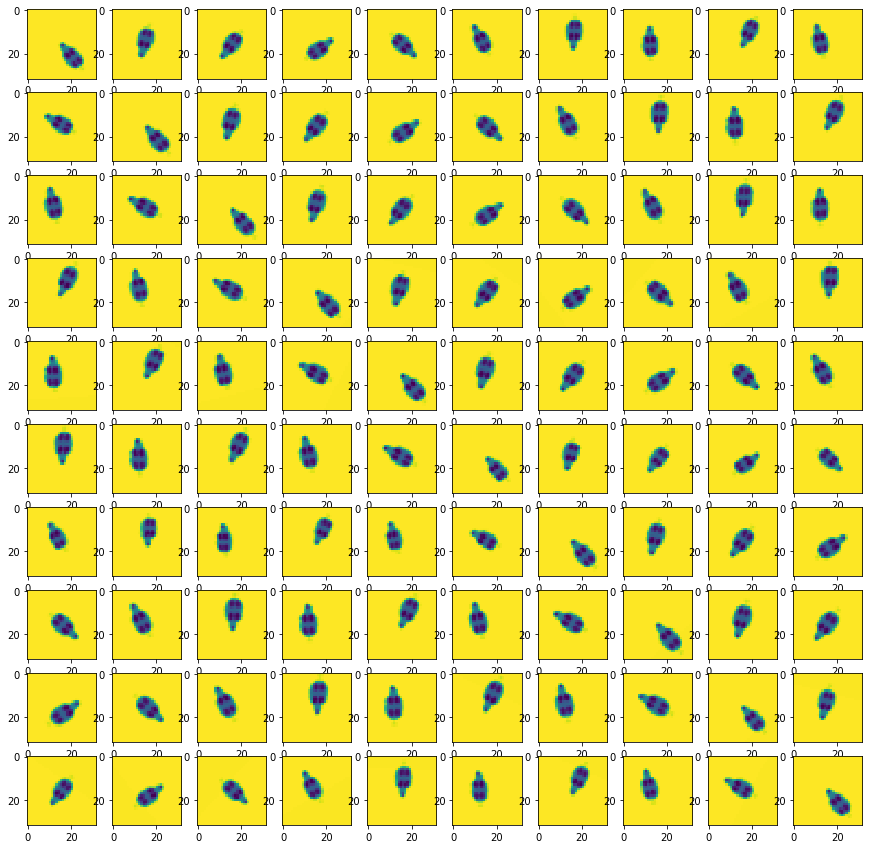

In [146]:
depth_im_t_f = load_file('depth_ims_tf_table_')
print(len(depth_im_t_f))
depth_im_t = depth_im_t_f[0,...]
print(len(depth_im_t))
display_images(depth_im_t_f)
depth_im_f_l = fnmatch.filter(os.listdir(data_f), 'depth_ims_tf_table_*')
print("Number of files with depth images: " + str(len(depth_im_f_l)))

## Binary Images

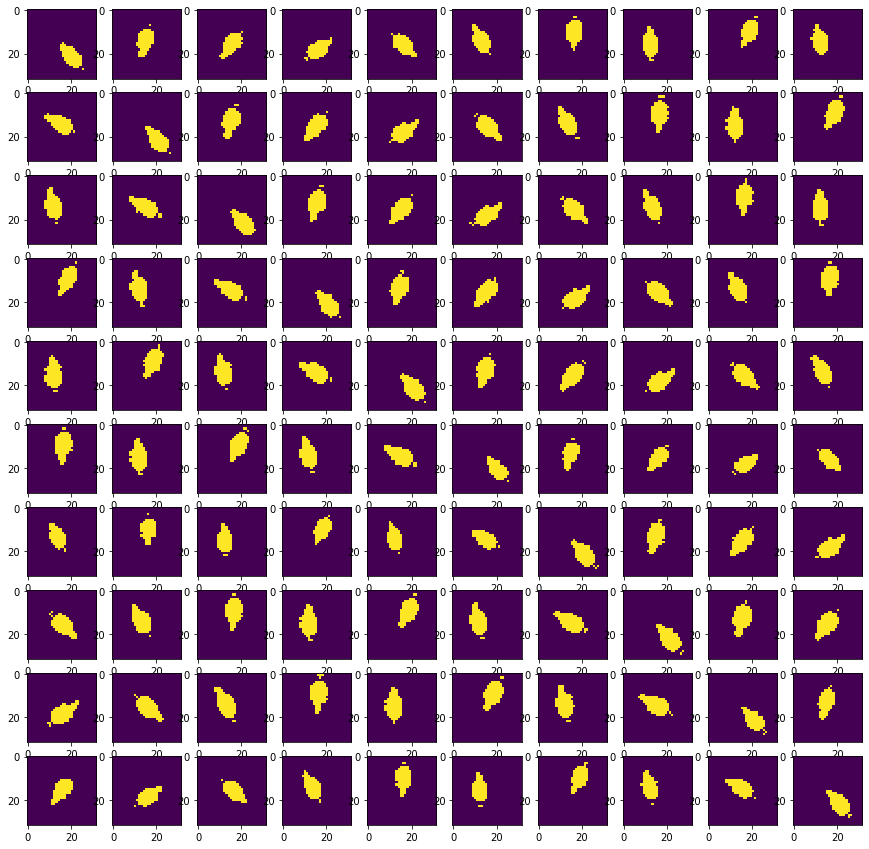

In [147]:
binary_ims_tf = load_file('binary_ims_tf_')
display_images(binary_ims_tf)

## Depth Images

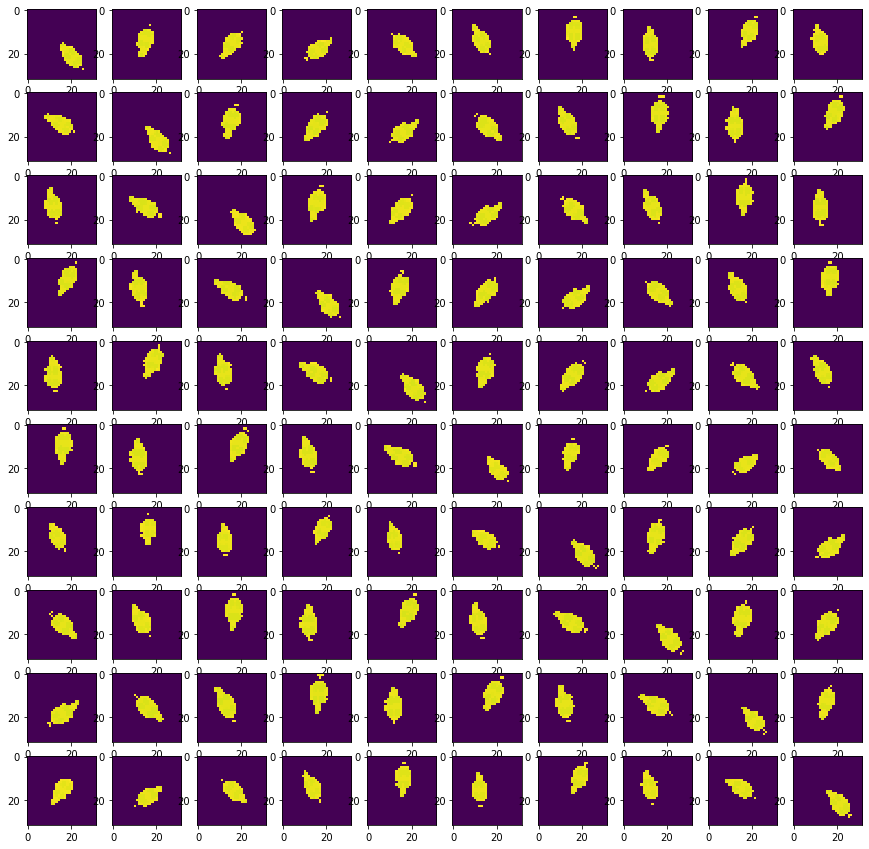

In [154]:
depth_im_f = load_file('depth_ims_tf_')
display_images(depth_im_f)

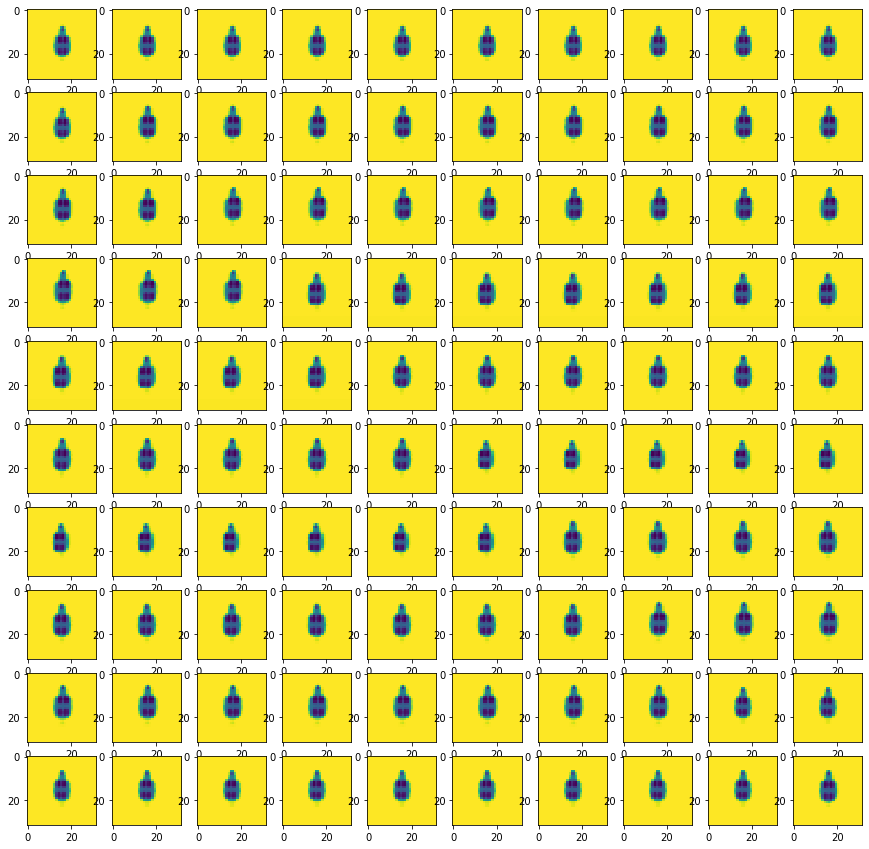

In [150]:
depth_ims_raw_table = load_file("depth_ims_raw_table_")
display_images(depth_ims_raw_table)

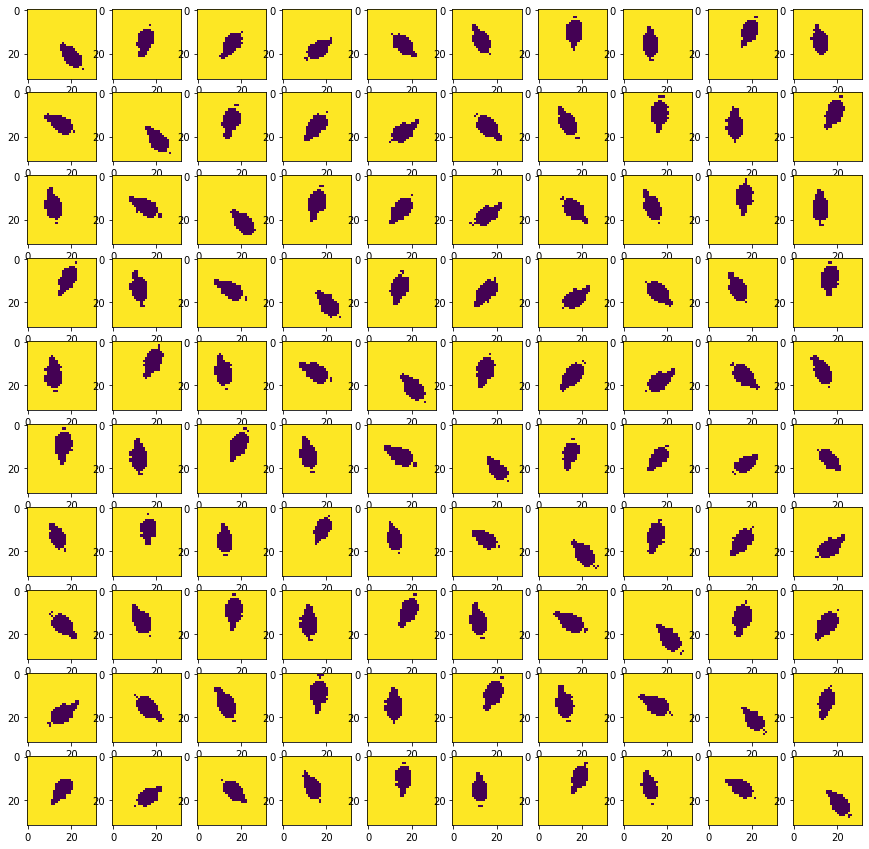

In [151]:
table_mask = load_file("table_mask_")
display_images(table_mask)

# Object Labels

In [152]:
object_l_f = np.load(data_f + '/object_labels_' + file_nr_str + '.npz')['arr_0']
display_data(object_l_f)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Metrics

## Robust Ferrari Canny

In [104]:
rfc_f = np.load(data_f + '/robust_ferrari_canny_' + file_nr_str + '.npz')['arr_0']
display_data(rfc_f)

[0.         0.00071162 0.         0.         0.         0.
 0.         0.         0.         0.0036971 ]
[0.         0.         0.00071162 0.         0.         0.
 0.         0.         0.         0.        ]
[0.0036971  0.         0.         0.00071162 0.         0.
 0.         0.         0.         0.        ]
[0.         0.0036971  0.         0.         0.00071162 0.
 0.         0.         0.         0.        ]
[0.         0.         0.0036971  0.         0.         0.00071162
 0.         0.         0.         0.        ]
[0.         0.         0.         0.0036971  0.         0.
 0.00071162 0.         0.         0.        ]
[0.         0.         0.         0.         0.0036971  0.
 0.         0.00071162 0.         0.        ]
[0.         0.         0.         0.         0.         0.0036971
 0.         0.         0.00071162 0.        ]
[0.         0.         0.         0.         0.         0.
 0.0036971  0.         0.         0.00071162]
[0.        0.        0.        0.       

# Raw images

Number of files with raw images: 13458
Images per file: 1000


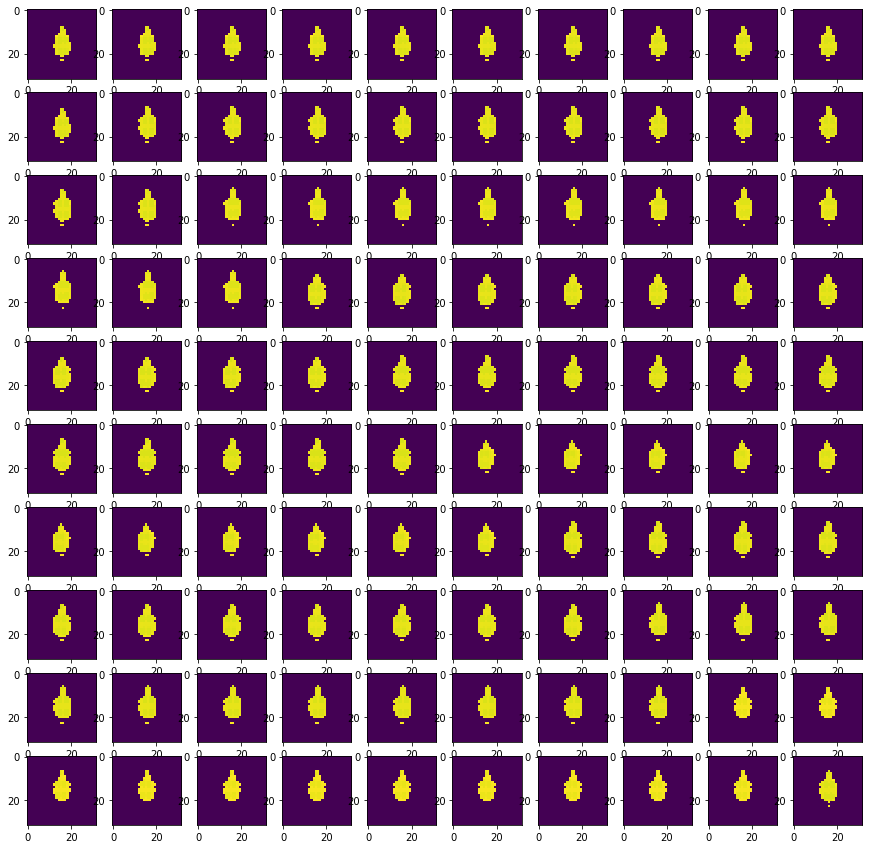

In [149]:
depth_ims_raw = load_file("depth_ims_raw_")
display_images(depth_ims_raw)
raw_imgs_f_l = fnmatch.filter(os.listdir(data_f), 'depth_ims_raw_*')
print("Number of files with raw images: " + str(len(raw_imgs_f_l)))
print("Images per file: " + str(len(depth_ims_raw)))

# Image Labels

In [153]:
img_l_f = np.load(data_f + '/image_labels_' + file_nr_str + '.npz')['arr_0']
display_data(img_l_f)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
[100. 101. 101. 101. 101. 101. 101. 101. 101. 101.]
[101. 101. 102. 102. 102. 102. 102. 102. 102. 102.]
[102. 102. 102. 103. 103. 103. 103. 103. 103. 103.]
[103. 103. 103. 103. 104. 104. 104. 104. 104. 104.]
[104. 104. 104. 104. 104. 105. 105. 105. 105. 105.]
[105. 105. 105. 105. 105. 105. 106. 106. 106. 106.]
[106. 106. 106. 106. 106. 106. 106. 107. 107. 107.]
[107. 107. 107. 107. 107. 107. 107. 107. 108. 108.]
[108. 108. 108. 108. 108. 108. 108. 108. 108. 109.]
